In [1]:
import json

In [2]:
import pandas

In [3]:
import matplotlib.pyplot as plt

In [4]:
import glob

In [5]:
import os

In [6]:
TRAIN_PREFIX = "INFO:train_inner:"
VALID_PREFIX = "INFO:valid:"

In [7]:
def read_log(folder_name, split='train_inner'):
    records = []
    for fname in sorted(glob.glob(os.path.join(folder_name, "*train.stderr.*"))):
#         print(fname)
        with open(fname) as f:
            prefix = f"INFO:{split}:"
            for line in f.readlines():
                if line.startswith(prefix):
                    line = line.lstrip(prefix)
                    record = json.loads(line)
                    records.append(record)
    for fname in sorted(glob.glob(os.path.join(folder_name, "train.log"))):
#         print(fname)
        with open(fname) as f:
            infix = f"INFO | {split} |"
            for line in f.readlines():
                if infix in line:
                    line = line[line.index(infix):]
                    line = line.lstrip(infix)
                    record = json.loads(line)
                    records.append(record)
#     print(len(records))
    df = pandas.DataFrame(records)#.infer_objects()
    dedup_col = 'num_updates' if split == 'train_inner' else 'valid_num_updates'
    return df.drop_duplicates(dedup_col, keep='last')

In [8]:
# paths = {
#     "lm-1b-clipped": "/checkpoint/dpf/2022-02-15/code.tk-ours.1.3b.lr8e-4.clip.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf2.mu49591.s1.ngpu32/",
#     "lm-1b-unclipped": "/checkpoint/scottyih/2022-02-14/code.tk-ours.1.3b.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl0.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf2.mu49591.s1.ngpu32/",
#     "cm-1b-eosblocked-64": "/checkpoint/dpf/2022-02-15/code.cm.tk-ours.1.3b.lr8e-4.fp16.transformer_lm_gpt.adam.beta0.9_0.98.wd0.01.clip1.0.lr0.0008.warmup1500.sampletok2048.breakeos_blocked.bs8.updatefreq1.seed3.ngpu64/",
#     "cm-1b-eosblocked-64-8e-4--4e-4": "/checkpoint/dpf/2022-02-15/code.cm.tk-ours.1.3b.lr8e-4--4e-4.fp16.transformer_lm_gpt.adam.beta0.9_0.98.wd0.01.clip1.0.lr0.0004.warmup1500.sampletok2048.breakeos_blocked.bs8.updatefreq1.seed3.ngpu64/",
#     "cm-1b-eosblocked-64-8e-4--4e-4-initscale": "/checkpoint/dpf/2022-02-15/code.cm.tk-ours.1.3b.lr8e-4--4e-4.fis4.fp16.transformer_lm_gpt.adam.beta0.9_0.98.wd0.01.clip1.0.lr0.0004.warmup1500.sampletok2048.breakeos_blocked.bs8.updatefreq1.seed3.fp16initscale4.ngpu64/",
#     "cm-1b-eosblocked-128-32e-4": "/checkpoint/dpf/2022-02-18/code.cm.tk-ours.1.3b.lr32e-4.tbs1024.fp16.transformer_lm_gpt.adam.beta0.9_0.98.wd0.01.clip1.0.lr0.0032.warmup1500.sampletok2048.breakeos_blocked.bs8.updatefreq1.seed3.ngpu128/",
#     "cm-1b-eosblocked-128-16e-4": "/checkpoint/dpf/2022-02-18/code.cm.tk-ours.1.3b.lr16e-4.tbs1024.fp16.transformer_lm_gpt.adam.beta0.9_0.98.wd0.01.clip1.0.lr0.0016.warmup1500.sampletok2048.breakeos_blocked.bs8.updatefreq1.seed3.ngpu128/",
#     "cm-1b-eosblocked-128-16e-4--8e-4": "/checkpoint/dpf/2022-02-18/code.cm.tk-ours.1.3b.lr16e-4--8e-4.fis4.tbs1024.fp16.transformer_lm_gpt.adam.beta0.9_0.98.wd0.01.clip1.0.lr0.0008.warmup1500.sampletok2048.breakeos_blocked.bs8.updatefreq1.seed3.fp16initscale4.ngpu128/",
#     "cm-1b-eosblocked-128-scott": "/checkpoint/dpf/models/cm-1B",
#     "cm-6b": "/checkpoint/armenag/codex/logs/"
# }

In [9]:
# epoch \t humaneval pass@1 percentage 
# (from https://docs.google.com/spreadsheets/d/1nq15TZvYdwxxLcf4Qm2D3WZrM-83-gjXclPqZayNHWw/edit#gid=0), snapped to closest validation epoch
cm_6B_he_raw = """
6000	7.3%
9000	7.9%
12750	9.8%
15750	10.4%
18750	9.8%
23250	13.4%
26250	10.4%
30000	12.8%
33750	15.8%
37000	15.8%
40000	15.8%
43000	12.2%
46000	15.8%
"""
all_tokens = [line.split('\t') for line in cm_6B_he_raw.splitlines() if line.strip()]
# cm_6B_humaneval_scores_by_num_updates = [
#     {'valid_num_updates': int(toks[0]), 
#      'humaneval_pass1': float(toks[1].rstrip('%'))}
#     for toks in all_tokens
# ]
cm_6B_humaneval_scores_by_num_updates = {
    int(toks[0]): float(toks[1].rstrip('%'))
    for toks in all_tokens
}

In [10]:
# cm_6B_valid_log.merge(df, on='valid_num_updates', how='outer')

In [11]:
paths = {
    "lm-1b-clipped": "/checkpoint/dpf/2022-02-15/code.tk-ours.1.3b.lr8e-4.clip.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf2.mu49591.s1.ngpu32/",
#     "lm-1b-unclipped": "/checkpoint/scottyih/2022-02-14/code.tk-ours.1.3b.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl0.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf2.mu49591.s1.ngpu32/",
    "cm-1b-eosblocked-128-scott": "/checkpoint/dpf/models/cm-1.3B/",
    "cm-6b": "/checkpoint/armenag/codex/logs/",
    "InCoder-6B": "/checkpoint/armenag/codex/logs/",
    "InCoder-1B": "/checkpoint/dpf/models/cm-1.3B/",
    "lm-1b-py": "/checkpoint/dpf/2022-03-02/code.ours-py.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf8.mu10490.s1.ngpu8",
    "lm-1b-py-so": "/checkpoint/sida/2022-03-03/code.ours-py-so.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf2.mu23841.s1.ngpu32",
    "lm-1b-gpt2-py-so": "/checkpoint/dpf/2022-03-18/code.gpt2-py-so.fsdp.me_fp16.transformer_lm_gpt.nlay24.emb2048.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms8.uf1.mu43869.s1.ngpu64",
    "bart-fsdp": "/checkpoint/dpf/2022-03-06/ours.bart.fsdp-bs4.bart_1B.tps2048.uf4.mu49591.ms4.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0004.warm1500.fp16.fsdp.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu32",
    "bart-pytorch-ddp": "/checkpoint/dpf/2022-03-06/ours.bart.pytorch-ddp.bs2.bart_1B.tps2048.uf8.mu49591.ms2.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0004.warm1500.fp16.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu32",
    "bart-3-7": "/checkpoint/dpf/2022-03-07/ours.bart.fsdp-bs4.bart_1B.tps2048.uf2.mu49591.ms4.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0004.warm1500.fp16.fsdp.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu64/",
    "bart-3-8": "/checkpoint/dpf/2022-03-08/ours.bart.fsdp-bs4.bart_1B.tps2048.uf2.mu49591.ms4.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0004.warm1500.fp16.fsdp.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu64/",
    "bart-ddp-oldinit-4e-4": "/checkpoint/dpf/2022-03-08/ours.bart.pytorch-ddp-bs4.old-init.bart_1B.tps2048.uf4.mu49591.ms2.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0004.warm1500.fp16.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu64/",
    # paused 1e-4 because the loss is way high
    "bart-ddp-oldinit-1e-4": "/checkpoint/dpf/2022-03-09/ours.bart.pytorch-ddp-bs2.old-init.bart_1B.tps2048.uf4.mu49591.ms2.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0001.warm1500.fp16.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu64/",
    "bart-ddp-oldinit-2e-4": "/checkpoint/dpf/2022-03-10/ours.bart.pytorch-ddp-bs2.old-init.bart_1B.tps2048.uf4.mu49591.ms2.dr0.1.atdr0.1.actdr0.0.wd0.01.adam.beta9999.eps1e-08.clip1.0.lr0.0002.warm1500.fp16.poi_lam3.5.mask0.3.mask_lenspan-poisson.rpl_len1.rotate0.mask_rand0.1.ins0.perm_sen0.0.ngpu64/",
    "lm-2b": "/checkpoint/scottyih/2022-03-21/ours.2.3B.fsdp.me_fp16.transformer_lm_gpt.nlay28.emb2560.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.00016.wu1500.dr0.1.atdr0.1.wd0.01.ms4.uf1.mu49591.s1.ngpu128",
    "lm-2b-8e-4": "/checkpoint/scottyih/2022-03-25/ours.2.3B.lr8e-4.fsdp.me_fp16.transformer_lm_gpt.nlay28.emb2560.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0008.wu1500.dr0.1.atdr0.1.wd0.01.ms4.uf1.mu49591.s1.ngpu128",
    "lm-2b-16e-4": "/checkpoint/dpf/2022-03-26/ours.2.3B.16e-4.fsdp.me_fp16.transformer_lm_gpt.nlay28.emb2560.bm_none.tps2048.adam.fp16adam.b2_0.98.eps1e-08.cl1.0.lr0.0016.wu1500.dr0.1.atdr0.1.wd0.01.ms4.uf1.mu49591.s1.ngpu128/",
}

In [12]:
train_logs = {
    name: read_log(folder_name, 'train_inner')
    for name, folder_name in paths.items()
}
valid_logs = {
    name: read_log(folder_name, 'valid')
    for name, folder_name in paths.items()
}

In [13]:
for key in valid_logs.keys():
    train_df = train_logs[key]
    valid_df = valid_logs[key]
    for col, t in {
        'num_updates': int,
        'valid_num_updates': int,
        'update': float,
        'valid_ppl': float,
    }.items():
        if col in train_df.columns:
            train_df[col] = train_df[col].map(t)
        if col in valid_df.columns:
            valid_df[col] = valid_df[col].map(t)
    rec = train_df.iloc[-1]
    if rec['update'] > 1.1: # issue to check into where we were logging 2 epochs
        continue
    updates_per_epoch = rec['num_updates'] / rec['update']
    valid_df['update'] = valid_df['valid_num_updates'] / updates_per_epoch
    if key in ['cm-6b', 'InCoder-6B']:
        # TODO: this is a hack needed because logs are partially missing
        valid_df = valid_df.merge(pandas.DataFrame([{
                'valid_num_updates': vnu,
                'humaneval_pass1': he,
            } for vnu, he in cm_6B_humaneval_scores_by_num_updates.items()
            ]), on='valid_num_updates', how='outer')
        valid_df['update'] = valid_df['valid_num_updates'] / updates_per_epoch
        valid_logs[key] = valid_df

In [14]:
cm_6B_valid_log = valid_logs['cm-6b']

In [15]:
cm_6B_valid_log

,epoch,valid_loss,valid_summed_loss,valid_ppl,valid_wps,valid_wpb,valid_bsz,valid_num_updates,valid_best_loss,update,humaneval_pass1
0,1.0,4.113,6.185662e+09,17.30,222451,1.58814e+06,1918.3,750,NaN,0.016252,NaN
1,1.0,3.4,5.113155e+09,10.55,222608,1.58815e+06,1918.3,1500,3.4,0.032504,NaN
2,1.0,2.858,4.298513e+09,7.25,222680,1.58814e+06,1918.3,2250,2.858,0.048757,NaN
3,1.0,2.649,3.984748e+09,6.27,222724,1.58817e+06,1918.3,3000,2.649,0.065009,NaN
4,1.0,2.53,3.805471e+09,5.78,222758,1.58816e+06,1918.3,3750,2.53,0.081261,NaN
5,1.0,2.453,3.688715e+09,5.47,222905,1.58816e+06,1918.3,4500,2.453,0.097513,NaN
6,1.0,2.398,3.606027e+09,5.27,222746,1.58817e+06,1918.3,5250,2.398,0.113766,NaN
7,1.0,2.355,3.542264e+09,5.12,222666,1.58813e+06,1918.3,6000,2.355,0.130018,7.3
8,1.0,2.321,3.491123e+09,5.00,222687,1.58811e+06,1918.3,6750,2.321,0.146270,NaN
9,1.0,2.294,3.450819e+09,4.91,222602,1.58816e+06,1918.3,7500,2.294,0.162522,NaN


In [16]:
#lm1b_keys = ['lm-1b-clipped', 'lm-1b-py', 'lm-1b-py-so', 'lm-1b-gpt2-py-so', 'lm-2b', 'lm-2b-8e-4', "lm-2b-16e-4"]
lm1b_keys = ['lm-1b-clipped', 'lm-2b', 'lm-2b-8e-4', "lm-2b-16e-4"]

In [17]:
valid_logs.keys()

dict_keys(['lm-1b-clipped', 'cm-1b-eosblocked-128-scott', 'cm-6b', 'InCoder-6B', 'InCoder-1B', 'lm-1b-py', 'lm-1b-py-so', 'lm-1b-gpt2-py-so', 'bart-fsdp', 'bart-pytorch-ddp', 'bart-3-7', 'bart-3-8', 'bart-ddp-oldinit-4e-4', 'bart-ddp-oldinit-1e-4', 'bart-ddp-oldinit-2e-4', 'lm-2b', 'lm-2b-8e-4', 'lm-2b-16e-4'])

In [18]:
import seaborn as sns

In [19]:
sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))

In [20]:
def plot(logs=train_logs, metric='loss', names=paths.keys(), smooth_window_size=None, x_key=None):
    ax = plt.gca()
    for name in names:
        df = logs[name]
        if x_key is None:
            if 'num_updates' in df.columns:
                x_key = 'num_updates'
            else:
                x_key = 'valid_num_updates'
            x = df[x_key].map(int)
        else:
            x = df[x_key].map(float)
        y = df[metric].map(float)
        if smooth_window_size is not None:
            x = x[:-smooth_window_size//2]
            y = np.convolve(y, np.ones(smooth_window_size) / smooth_window_size, mode='same')[:-smooth_window_size//2]
        sns.lineplot(x, y, ax=ax, label=name)
#         ax.plot(x, y, label=name)
    plt.ylabel(metric)
    plt.legend()

In [21]:
pwd

'/private/home/dpf/projects/htlm_2/fairseq-py/notebooks'

/private/home/dpf/.conda/envs/analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/private/home/dpf/.conda/envs/analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


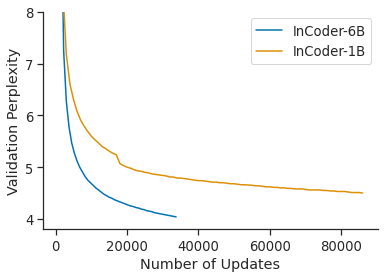

In [22]:
plt.figure()
plot(valid_logs, 'valid_ppl', names=['InCoder-6B', 'InCoder-1B'])
plt.xlabel("Number of Updates")
plt.ylabel("Validation Perplexity")
plt.ylim(3.8, 8)
sns.despine()
# plt.savefig("resources/training_ppl_all.pdf", bbox_inches='tight', pad_inches=0)

/private/home/dpf/.conda/envs/analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/private/home/dpf/.conda/envs/analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


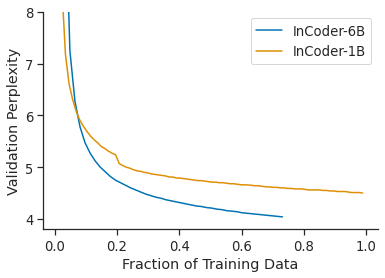

In [23]:
plt.figure()
plot(valid_logs, 'valid_ppl', names=['InCoder-6B', 'InCoder-1B'], x_key='update')
plt.xlabel("Fraction of Training Data")
plt.ylabel("Validation Perplexity")
plt.ylim(3.8, 8)
sns.despine()
# plt.savefig("resources/training_ppl_by_fraction.pdf", bbox_inches='tight', pad_inches=0)

In [24]:
import numpy as np

In [25]:
pdb on

Automatic pdb calling has been turned ON


In [26]:
cm_6B_valid_log.columns

Index(['epoch', 'valid_loss', 'valid_summed_loss', 'valid_ppl', 'valid_wps',
       'valid_wpb', 'valid_bsz', 'valid_num_updates', 'valid_best_loss',
       'update', 'humaneval_pass1'],
      dtype='object')

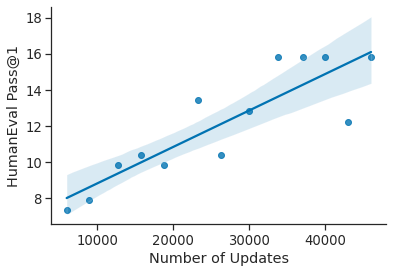

In [27]:
sns.regplot(x='valid_num_updates', y='humaneval_pass1', data=cm_6B_valid_log)
plt.xlabel("Number of Updates")
plt.ylabel("HumanEval Pass@1")
# plt.ylim(3.8, 8)
sns.despine()
plt.savefig("resources/humaneval_by_updates.pdf", bbox_inches='tight', pad_inches=0)

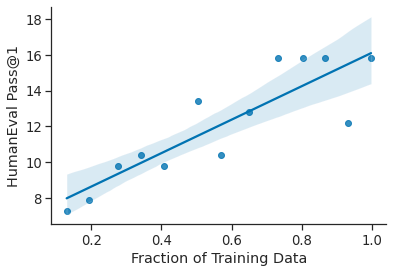

In [28]:
sns.regplot(x='update', y='humaneval_pass1', data=cm_6B_valid_log)
plt.xlabel("Fraction of Training Data")
plt.ylabel("HumanEval Pass@1")
# plt.ylim(3.8, 8)
sns.despine()
plt.savefig("resources/humaneval_by_fraction.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
pandas.join(valid_logs['cm-6b'], )

# OLD LOG ANALYSIS

In [16]:
bart_keys = ['bart-fsdp', 'bart-pytorch-ddp', 'bart-3-7', 'bart-3-8', 'bart-ddp-oldinit-4e-4', 'bart-ddp-oldinit-2e-4', 'bart-ddp-oldinit-1e-4']
# bart_keys = ['bart-fsdp', 'bart-pytorch-ddp', 'bart-3-7', 'bart-3-8', 'bart-ddp-oldinit-4e-4', 'bart-ddp-oldinit-1e-4']

(10000000.0, 30000000.0)

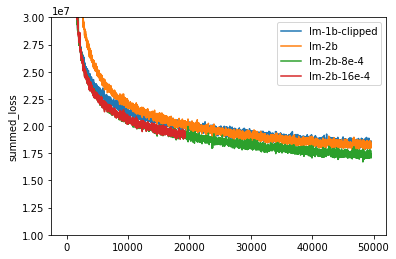

In [17]:
# plt.figure(figsize=(12,10))
#plot(train_logs, 'loss', smooth_window_size=10, names=['cm-1b-eosblocked-128-scott', 'cm-6b'])
# plot(train_logs, 'loss', smooth_window_size=10)
#plot(train_logs, 'loss', smooth_window_size=10, names=['bart-fsdp', 'bart-pytorch-ddp'])
plot(train_logs, 'summed_loss', names=lm1b_keys)
plt.ylim(1e7, 3e7)

(2.0, 5.0)

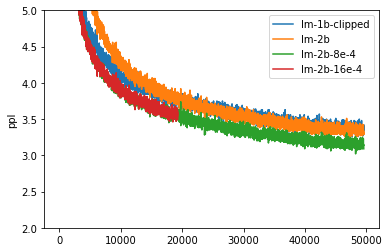

In [18]:
# plt.figure(figsize=(12,10))
#plot(train_logs, 'loss', smooth_window_size=10, names=['cm-1b-eosblocked-128-scott', 'cm-6b'])
# plot(train_logs, 'loss', smooth_window_size=10)
#plot(train_logs, 'loss', smooth_window_size=10, names=['bart-fsdp', 'bart-pytorch-ddp'])
plot(train_logs, 'ppl', names=lm1b_keys)
plt.ylim(2, 5)

In [19]:
import numpy as np

(0.0, 0.2)

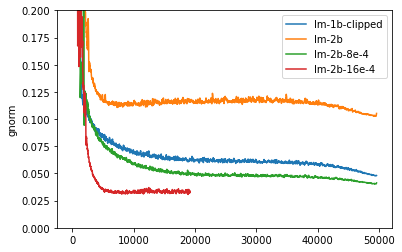

In [20]:
plt.figure()
# plot(train_logs, 'gnorm', smooth_window_size=10, names=['cm-1b-eosblocked-128-scott', 'cm-6b'])
# plot(train_logs, 'gnorm', smooth_window_size=10, names=bart_keys)
plot(train_logs, 'gnorm', smooth_window_size=10, names=lm1b_keys)
plt.ylim(0,0.2)

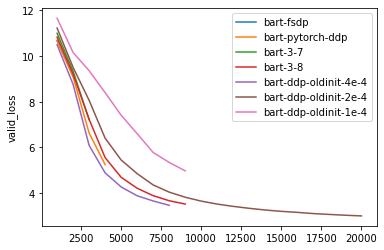

In [21]:
plt.figure()
# plot(valid_logs, 'valid_loss', names=['cm-1b-eosblocked-128-scott', 'cm-6b'])
plot(valid_logs, 'valid_loss', names=bart_keys)
# plt.ylim(0, 5)

(4.0, 6.0)

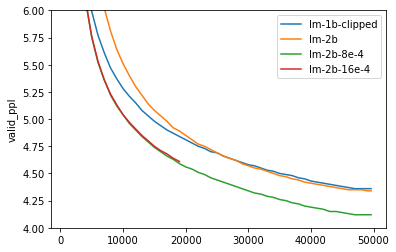

In [19]:
plt.figure()
# plot(valid_logs, 'valid_ppl', names=['cm-1b-eosblocked-128-scott', 'cm-6b'])
plot(valid_logs, 'valid_ppl', names=lm1b_keys)
plt.ylim(4, 6)

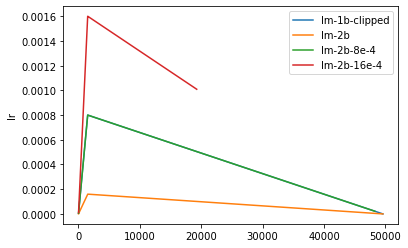

In [136]:
plot(train_logs, 'lr', names=lm1b_keys)
# plt.ylim(1, 5)